**Dropout Regularization In Deep Neural Network**

This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.

Dataset information: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks) Download it from here: https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

Dropout Regularization is a technique to tackle overfitting in the Deep Learning field. Adding a dropout layer increases the performance of the Neural Network.

Dropping out neurons in the hidden layers at random. In the below picture, the dropout rate is 50% because in each hidden layers half of the neurons are dropped at random.

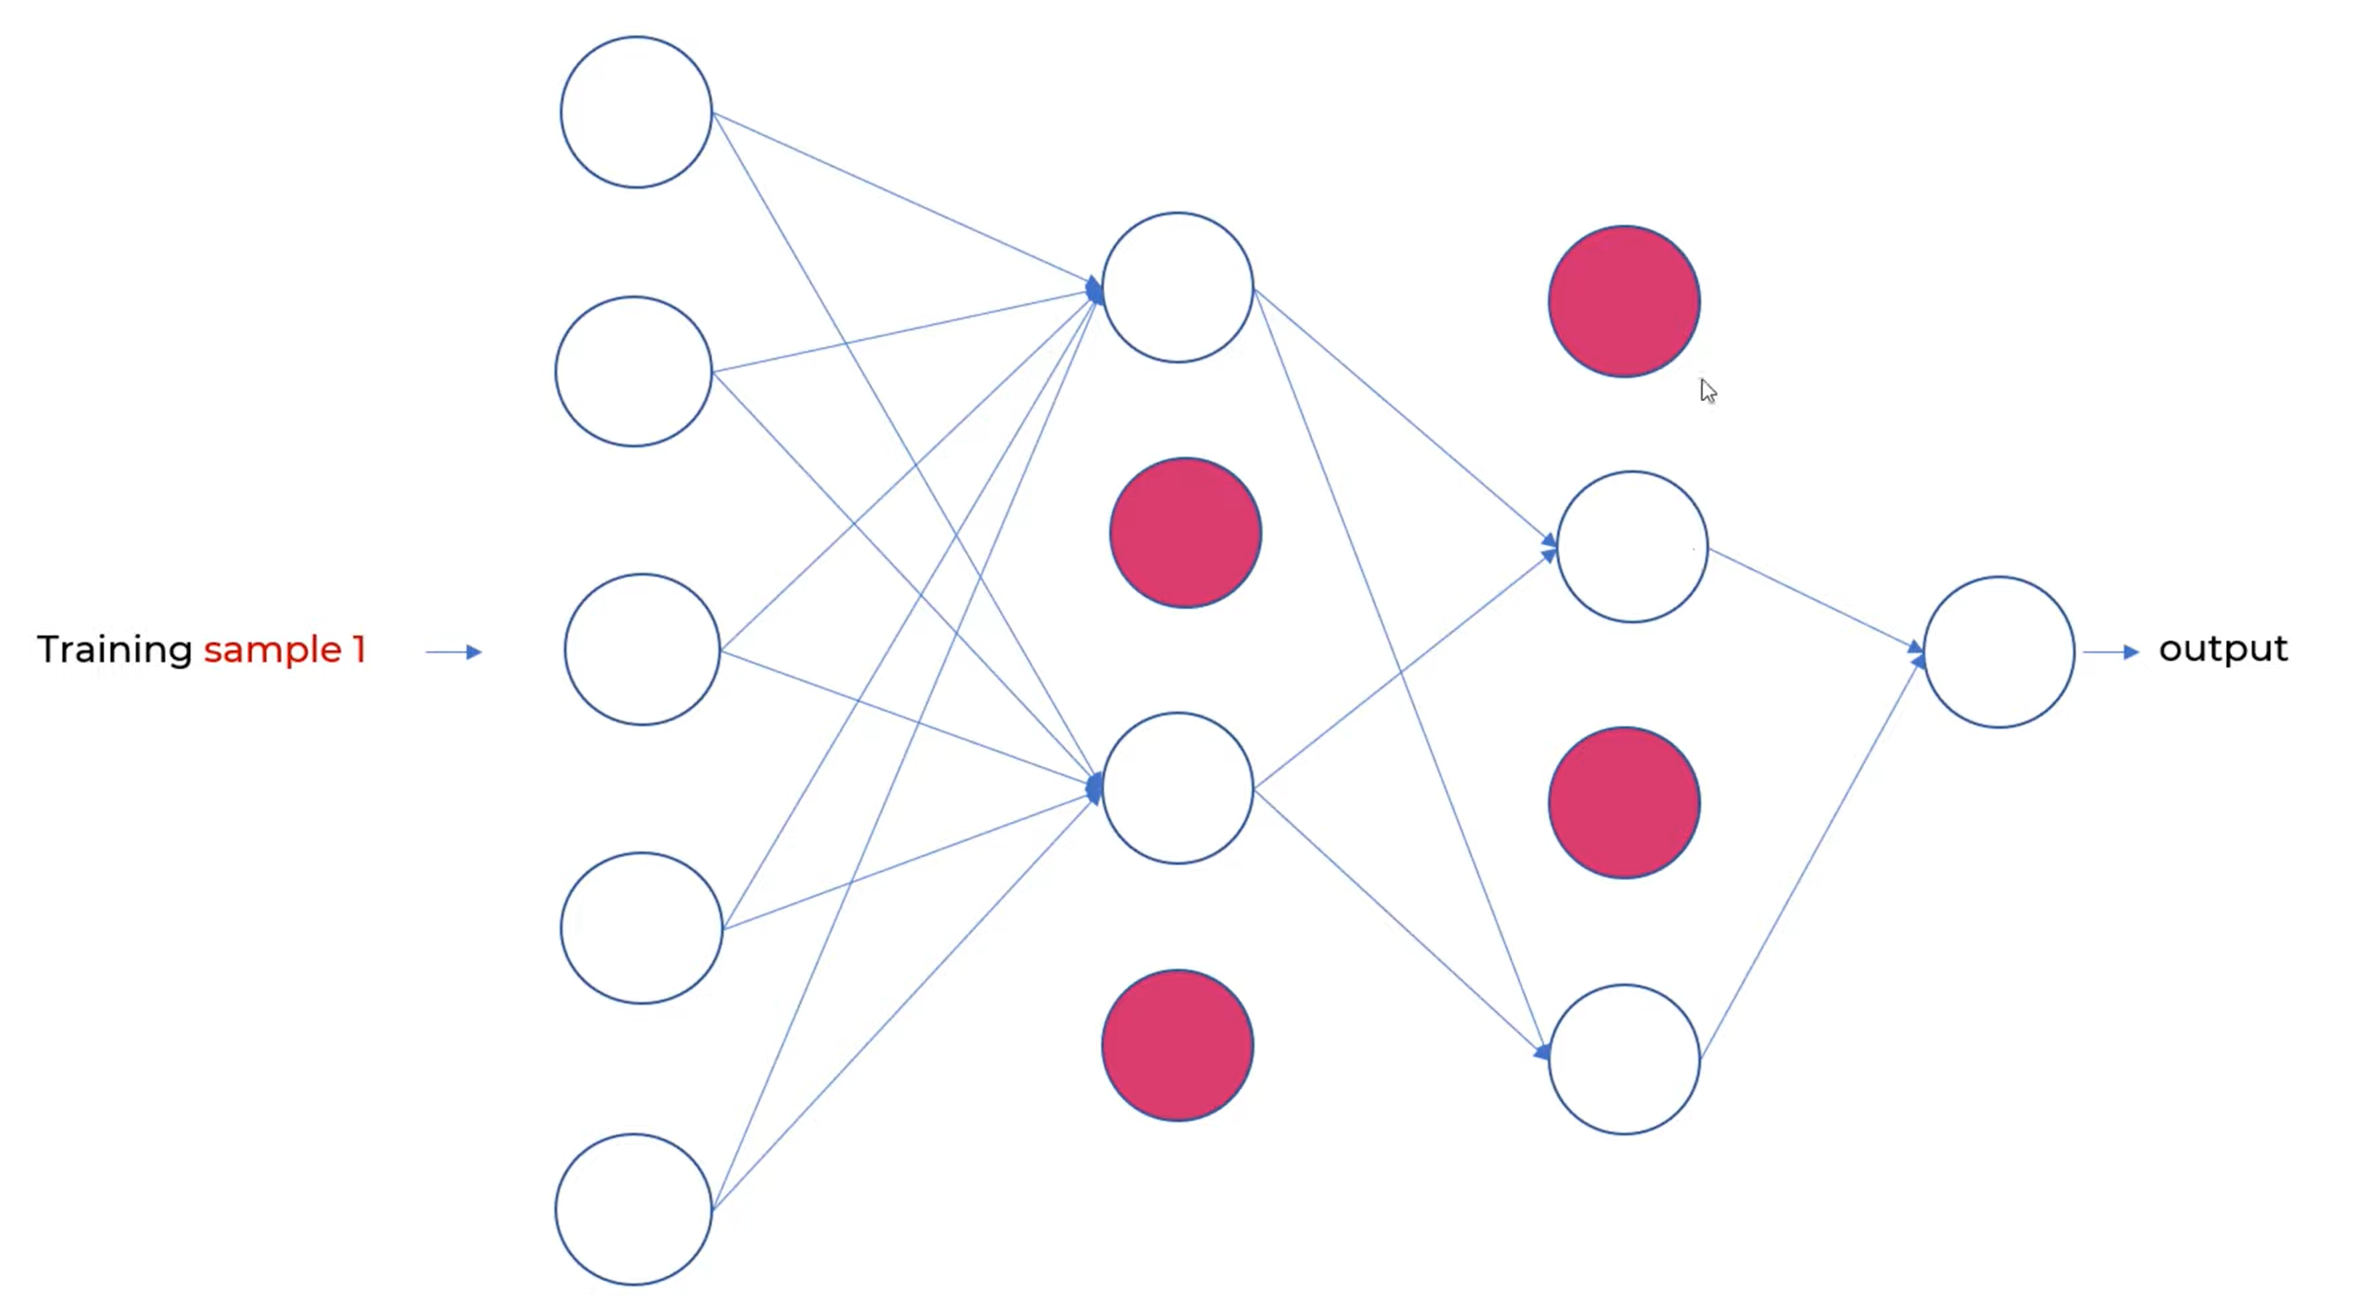

Again dropping at random neurons in the hidden layers for 2nd training sample

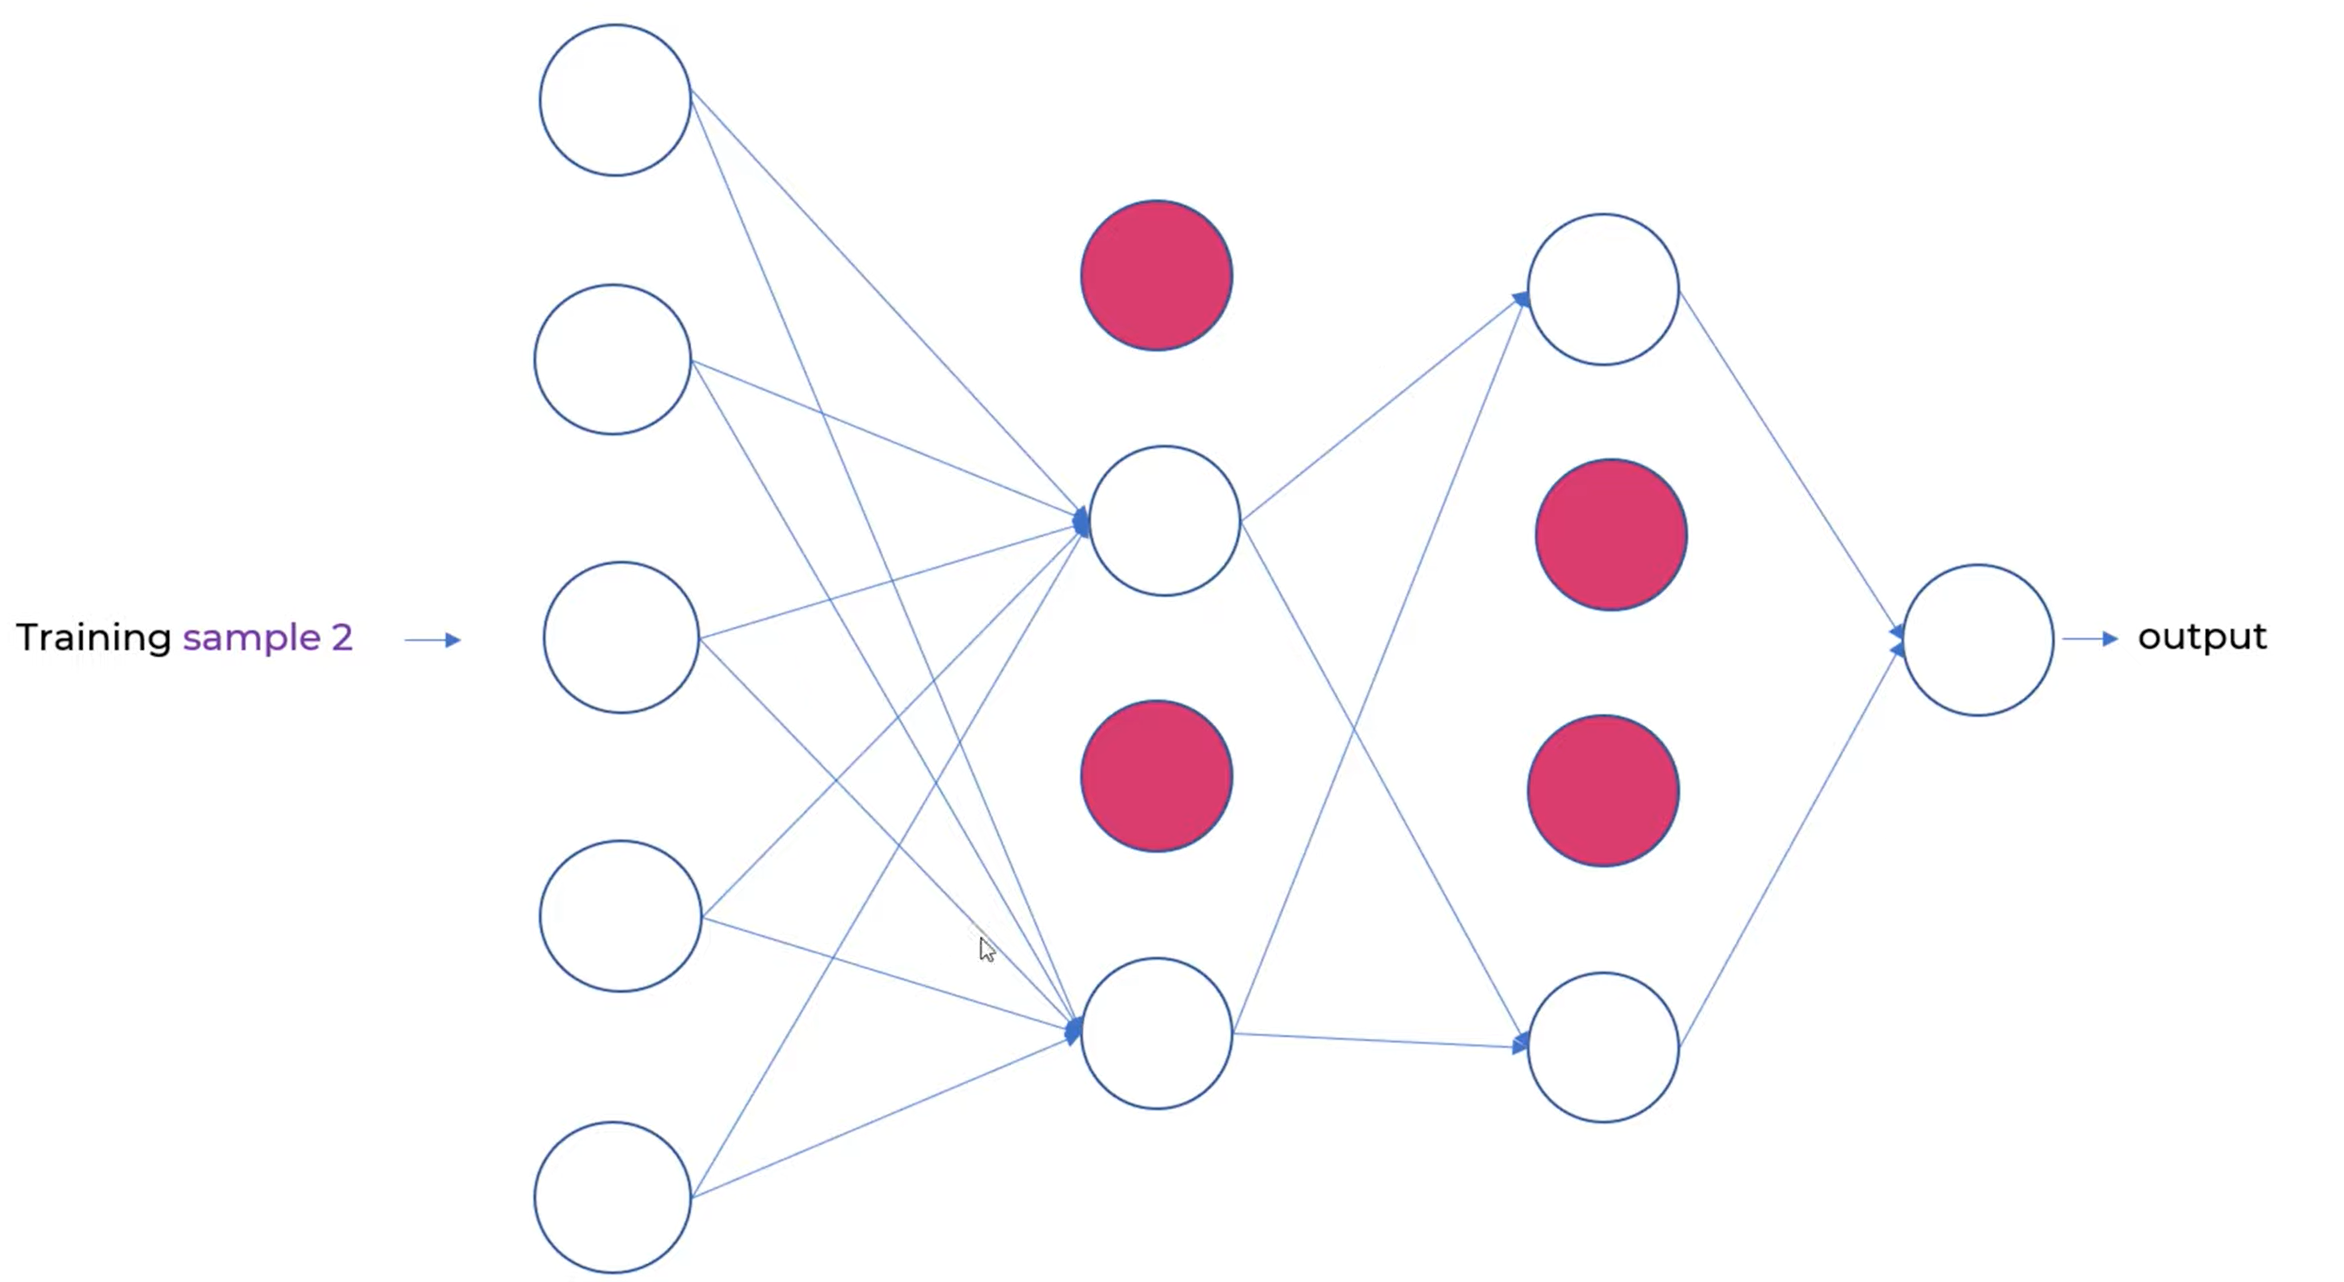

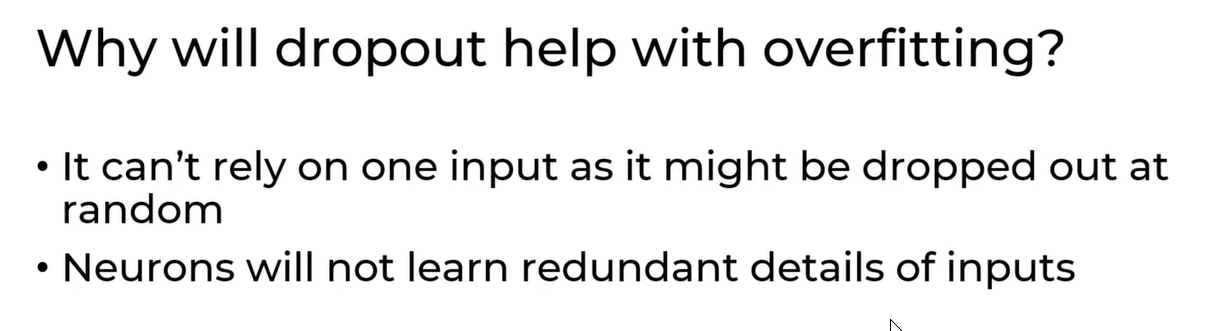

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("sonar_dataset.csv", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063,R
34,0.0311,0.0491,0.0692,0.0831,0.0079,0.0200,0.0981,0.1016,0.2025,0.0767,...,0.0087,0.0032,0.0130,0.0188,0.0101,0.0229,0.0182,0.0046,0.0038,R
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M
29,0.0189,0.0308,0.0197,0.0622,0.0080,0.0789,0.1440,0.1451,0.1789,0.2522,...,0.0038,0.0096,0.0142,0.0190,0.0140,0.0099,0.0092,0.0052,0.0075,R
118,0.0363,0.0478,0.0298,0.0210,0.1409,0.1916,0.1349,0.1613,0.1703,0.1444,...,0.0115,0.0190,0.0055,0.0096,0.0050,0.0066,0.0114,0.0073,0.0033,M


In [16]:
df.shape

(208, 61)

In [17]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [18]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [19]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [25]:
X = df.drop(60, axis=1)
Y = df[60]
Y.sample(5)

187    M
189    M
204    M
25     R
176    M
Name: 60, dtype: object

In [26]:
Y = pd.get_dummies(Y, drop_first=True).astype(int)
Y.sample(5) # R --> 1 and M --> 0

,R
42,1
59,1
19,1
52,1
137,0


In [27]:
Y.value_counts()

R
0    111
1     97
Name: count, dtype: int64

In [28]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [31]:
X_train.shape

(156, 60)

In [32]:
X_test.shape

(52, 60)

In [33]:
Y_test.shape

(52, 1)

**Using Deep Learning Model**

#### **Model without Dropout Layer**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [37]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5026 - loss: 0.7254
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6112 - loss: 0.6824 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - loss: 0.6635 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7216 - loss: 0.6390 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.6014 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7836 - loss: 0.5813 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.5525 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7495 - loss: 0.5433 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7832 - loss: 0.5260 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.4590 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.4412 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [38]:
model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7396 - loss: 1.0031  


[0.9686157703399658, 0.75]

Training Accuracy >>> Test Accuracy

In [48]:
Y_pred = model.predict(X_test).reshape(-1)
print(Y_pred[:10])

# round the values to nearest integer ie 0 or 1
Y_pred = np.round(Y_pred)
print(Y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[5.9673006e-05 9.9497890e-01 9.8389953e-01 3.5956904e-04 1.0000000e+00
 9.9739075e-01 1.0167796e-01 9.9999994e-01 2.0538734e-03 1.0000000e+00]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


reshape(-1): This reshapes the predicted output array into a one-dimensional array (a flat vector).

-1: This argument tells NumPy (or a similar library being used by predict) to automatically calculate the correct size for the dimension, based on the data. It flattens the array into a single dimension.

For example, if model.predict(X_test) returns a 2D array with shape (n_samples, 1), using .reshape(-1) will convert it into a 1D array of shape (n_samples,).

In [47]:
Y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.83      0.60      0.70        25

    accuracy                           0.75        52
   macro avg       0.77      0.74      0.74        52
weighted avg       0.77      0.75      0.74        52



#### **Model with Dropout Layer**

In [61]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, Y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5133 - loss: 0.7102
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5010 - loss: 0.6947 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 0.6881 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 0.6963 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4879 - loss: 0.6929 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4832 - loss: 0.6866 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6433 - loss: 0.6599 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5936 - loss: 0.6776 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4676 - loss: 0.6867 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - loss: 0.6431 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5880 - loss: 0.6736 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step

In [62]:
modeld.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7756 - loss: 0.5851  


[0.5257882475852966, 0.7884615659713745]

Training Accuracy is still good but Test Accuracy Improved

In [63]:
Y_pred = modeld.predict(X_test).reshape(-1)
print(Y_pred[:10])

# round the values to nearest integer ie 0 or 1
Y_pred = np.round(Y_pred)
print(Y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step 
[7.4220593e-06 9.3287516e-01 9.6802348e-01 2.9856877e-03 9.9991143e-01
 9.7723186e-01 3.4137356e-01 9.9994487e-01 1.4047888e-03 9.9993968e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [64]:
Y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [66]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.85      0.68      0.76        25

    accuracy                           0.79        52
   macro avg       0.80      0.78      0.78        52
weighted avg       0.80      0.79      0.79        52



You can see that by using dropout layer test accuracy increased from 0.75 to 0.79